### Goal: Determine if coculture swap explains loss and gain of mutations in UA3-2200.

UA2 (labeled as UE2) and UR1 coculture tubes flank UA3 (labeled as UE3) tubes in the rack.

#### Tasks
##### A. Are UA3-2200 "new" mutations present in UA2 or UR1 before 2200 generations?

*UR1-1000 and earlier:* **YES** 

*UA2-1000:* **NO**

1. ~~Identify mutations in UA3 that first show up at 2200 generations.~~
2. ~~Determine if there is overlap between mutations in #1, and UR1 (up to 1000 generations only).~~ **YES**
3. ~~Determine if there is overlap between mutations in #1, and UA2 (Stahl, 1000 generations only).~~ **NO**
4. Design primers to sequence region where mutations in #2 appear. 
5. Use primers in #4 to sequence samples from UA3, UA2, and UR1, -2100, -2200, and -2300. If mutations PRESENT in UA2 or UR1 BEFORE 2200, swap may have happened. If mutations also ABSENT in UA2 or UR1 AFTER 2200, swap most likely happened.

##### B. Are UA3-2200 "lost" mutations present in UA2 or UR1 after 2200 generations?

*UR1-2300:*

*UA2-2300:*

*UR1-1000 and earlier:* **NO**

*UA2-1000:* **NO**

1. ~~Identify mutations in UA3 that disappear at 2200 generations.~~
2. Design primers to sequence regions where mutations in #1 appear. 
3. Use primers in #2 to sequence samples from UA3, UA2, and UR1, -2100, -2200, and -2300. If mutations present in UA2 or UR1 after 2200, swap may have happened. If mutations also ABSENT in UA2 or UR1 BEFORE 2200, swap most likely happened.

##### C. Are UA3-2200 "new" mutations in A. present in UE3 or US1 at 1000 generations or earlier?
*UE3-1000 and earlier:* **NO**

*US1-1000 and earlier:* **NO**

1. ~~Determine if there is overlap between mutations in A1, and UE3 or US1 (up to 1000 generations only).~~

##### D. Are UA3-2200 "lost" mutations in B. present in UE3 or US1 at 1000 generations or earlier?
*UE3-1000 and earlier:* **NO**

*US1-1000 and earlier:* **NO**, except for '1429948 C' in Mm


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# new_ua3 from grc2019.ipynb
new_ua3 = pd.read_csv('~/Repositories/dvh_mms2/notebooks/data_exploration/output/new_ua3s_3000_mutations.csv')
new_ua3

In [5]:
def dropallna_col(df):
    '''Use on data frames comprising polymorphism columns and frequency values'''
    #Drop polymorphisms that don't exist, replace remaining NA's with 0%
    retained = df.dropna(how='all', axis=1).fillna(0)
    #Round frequencies to 2 decimals.
    #Drop polymorphisms that are >=99% across all time points, replace remaining NA's with 100%
    filtered = retained.mask(retained.round(2) >= 0.99).dropna(how='all', axis=1).fillna(1.0).copy()
    #Drop polymorphisms that are <=2% across all time points, replace remaining NA's with 0%
    filtered = filtered.mask(filtered <= 0.02).dropna(how='all', axis=1).fillna(0).copy()
    return filtered

In [115]:
# A1. Identify mutations in UA3 that first show up at 2200 generations.
new_ua3['polymorphism'] = new_ua3['position'].astype(str).str.cat(new_ua3['ALT'], sep=' ')
ua3_df = new_ua3[['line', 'genome_id', 'generation', 'polymorphism', 'polymorphism_frequency']].copy()
ua3_df_pvt = ua3_df.pivot_table(index=['genome_id', 'line', 'generation'], columns='polymorphism', values='polymorphism_frequency')

ua3_dvh_df_gain = dropallna_col(ua3_df_pvt.loc['NC_002937']).loc['UA3'].copy()
ua3_mm_df_gain = dropallna_col(ua3_df_pvt.loc['NC_005791']).loc['UA3'].copy()
ua3_dvplasmid_df_gain = dropallna_col(ua3_df_pvt.loc['NC_005863']).loc['UA3'].copy()

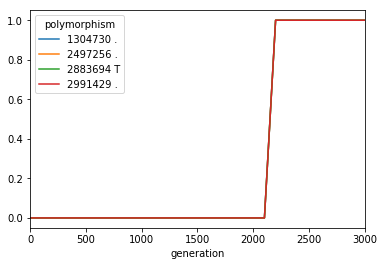

In [116]:
ua3_dvh_df_gain.loc[2100].mask(ua3_dvh_df_gain.loc[2100] != 0, inplace=True)
ua3_dvh_df_gain.dropna(axis=1, inplace=True)
ua3_dvh_df_gain.loc[2200].mask(ua3_dvh_df_gain.loc[2200] < 1, inplace=True)
ua3_dvh_df_gain.dropna(axis=1, inplace=True)
ua3_dvh_df_gain.plot()

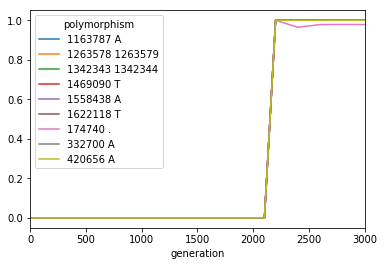

In [117]:
ua3_mm_df_gain.loc[2100].mask(ua3_mm_df_gain.loc[2100] != 0, inplace=True)
ua3_mm_df_gain.dropna(axis=1, inplace=True)
ua3_mm_df_gain.loc[2200].mask(ua3_mm_df_gain.loc[2200] < 1, inplace=True)
ua3_mm_df_gain.dropna(axis=1, inplace=True)
ua3_mm_df_gain.plot()

In [118]:
ua3_dvplasmid_df_gain.loc[2100].mask(ua3_dvplasmid_df_gain.loc[2100] != 0, inplace=True)
ua3_dvplasmid_df_gain.dropna(axis=1, inplace=True)
ua3_dvplasmid_df_gain.loc[2200].mask(ua3_dvplasmid_df_gain.loc[2200] < 1, inplace=True)
ua3_dvplasmid_df_gain.dropna(axis=1, inplace=True)
ua3_dvplasmid_df_gain

polymorphism
generation
0
100
300
500
780
1000
1100
1200
1500


In [ ]:
# A.2 Determine if there is overlap between mutations in A.1, and UR1 (up to 1000 generations only).
# new_ur1 from grc2019.ipynb
new_ur1 = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/output/new_ur1_1000_mutations.csv')
new_ur1

In [44]:
new_ur1['polymorphism'] = new_ur1['position'].astype(str).str.cat(new_ur1['ALT'], sep=' ')
ur1_df = new_ur1[['line', 'genome_id', 'generation', 'polymorphism', 'polymorphism_frequency']].copy()
ur1_df_pvt = ur1_df.pivot_table(index=['genome_id', 'line', 'generation'], columns='polymorphism', values='polymorphism_frequency')

ur1_dvh_df = dropallna_col(ur1_df_pvt.loc['NC_002937']).loc['UR1'].copy()
ur1_mm_df = dropallna_col(ur1_df_pvt.loc['NC_005791']).loc['UR1'].copy()
ur1_dvplasmid_df = dropallna_col(ur1_df_pvt.loc['NC_005863']).loc['UR1'].copy()

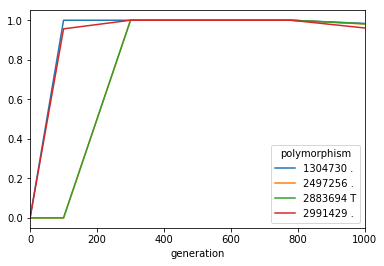

In [119]:
ur1_dvh_df[ua3_dvh_df_gain.columns].plot()

In [ ]:
ua3_mm_df_gain.columns

In [ ]:
ua3_mm_df_gain_subset = list(ua3_mm_df_gain.columns)
not_in_ur1 = ['1342343 1342344','1263578 1263579']
for mut in not_in_ur1:
    ua3_mm_df_gain_subset.remove(mut)
ua3_mm_df_gain_subset

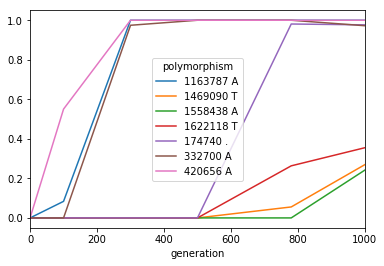

In [122]:
ur1_mm_df[ua3_mm_df_gain_subset].plot()

In [123]:
# B1. Identify mutations in UA3 that disappear at 2200 generations.
ua3_dvh_df_lost = dropallna_col(ua3_df_pvt.loc['NC_002937']).loc['UA3'].copy()
ua3_mm_df_lost = dropallna_col(ua3_df_pvt.loc['NC_005791']).loc['UA3'].copy()
ua3_dvplasmid_df_lost = dropallna_col(ua3_df_pvt.loc['NC_005863']).loc['UA3'].copy()

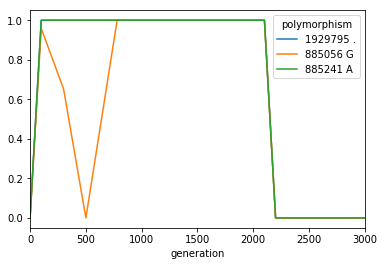

In [124]:
ua3_dvh_df_lost.loc[2200].mask(ua3_dvh_df_lost.loc[2200] != 0, inplace=True)
ua3_dvh_df_lost.dropna(axis=1, inplace=True)
ua3_dvh_df_lost.loc[2100].mask(ua3_dvh_df_lost.loc[2100] < 1, inplace=True)
ua3_dvh_df_lost.dropna(axis=1, inplace=True)
ua3_dvh_df_lost.plot()

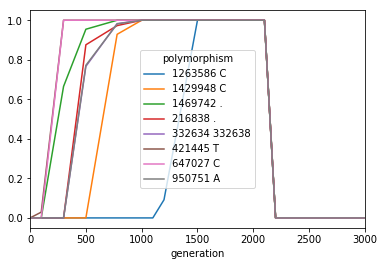

In [125]:
ua3_mm_df_lost.loc[2200].mask(ua3_mm_df_lost.loc[2200] != 0, inplace=True)
ua3_mm_df_lost.dropna(axis=1, inplace=True)
ua3_mm_df_lost.loc[2100].mask(ua3_mm_df_lost.loc[2100] < 1, inplace=True)
ua3_mm_df_lost.dropna(axis=1, inplace=True)
ua3_mm_df_lost.plot()

In [126]:
ua3_dvplasmid_df_lost.loc[2200].mask(ua3_dvplasmid_df_lost.loc[2200] != 0, inplace=True)
ua3_dvplasmid_df_lost.dropna(axis=1, inplace=True)
ua3_dvplasmid_df_lost.loc[2100].mask(ua3_dvplasmid_df_lost.loc[2100] < 1, inplace=True)
ua3_dvplasmid_df_lost.dropna(axis=1, inplace=True)
ua3_dvplasmid_df_lost

polymorphism
generation
0
100
300
500
780
1000
1100
1200
1500


In [128]:
ur1_dvh_df[ua3_dvh_df_lost.columns]

KeyError: "None of [Index(['1929795 .', '885056 G', '885241 A'], dtype='object', name='polymorphism')] are in the [columns]"

In [129]:
ur1_mm_df[ua3_mm_df_lost.columns]

KeyError: "None of [Index(['1263586 C', '1429948 C', '1469742 .', '216838 .', '332634 332638',\n       '421445 T', '647027 C', '950751 A'],\n      dtype='object', name='polymorphism')] are in the [columns]"

In [130]:
# C. and D. Cross-checking with UE3 and US1
new_ue3 = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/output/new_ue3_1000_mutations.csv')
new_us1 = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/output/new_us1_1000_mutations.csv')

In [132]:
new_ue3['polymorphism'] = new_ue3['position'].astype(str).str.cat(new_ue3['ALT'], sep=' ')
ue3_df = new_ue3[['line', 'genome_id', 'generation', 'polymorphism', 'polymorphism_frequency']].copy()
ue3_df_pvt = ue3_df.pivot_table(index=['genome_id', 'line', 'generation'], columns='polymorphism', values='polymorphism_frequency')

ue3_dvh_df = dropallna_col(ue3_df_pvt.loc['NC_002937']).loc['UE3'].copy()
ue3_mm_df = dropallna_col(ue3_df_pvt.loc['NC_005791']).loc['UE3'].copy()
ue3_dvplasmid_df = dropallna_col(ue3_df_pvt.loc['NC_005863']).loc['UE3'].copy()

new_us1['polymorphism'] = new_us1['position'].astype(str).str.cat(new_us1['ALT'], sep=' ')
us1_df = new_us1[['line', 'genome_id', 'generation', 'polymorphism', 'polymorphism_frequency']].copy()
us1_df_pvt = us1_df.pivot_table(index=['genome_id', 'line', 'generation'], columns='polymorphism', values='polymorphism_frequency')

us1_dvh_df = dropallna_col(us1_df_pvt.loc['NC_002937']).loc['US1'].copy()
us1_mm_df = dropallna_col(us1_df_pvt.loc['NC_005791']).loc['US1'].copy()

In [133]:
ue3_dvh_df[ua3_dvh_df_gain.columns]

KeyError: "None of [Index(['1304730 .', '2497256 .', '2883694 T', '2991429 .'], dtype='object', name='polymorphism')] are in the [columns]"

In [134]:
us1_dvh_df[ua3_dvh_df_gain.columns]

KeyError: "None of [Index(['1304730 .', '2497256 .', '2883694 T', '2991429 .'], dtype='object', name='polymorphism')] are in the [columns]"

In [135]:
ue3_mm_df[ua3_mm_df_gain.columns]

KeyError: "None of [Index(['1163787 A', '1263578 1263579', '1342343 1342344', '1469090 T',\n       '1558438 A', '1622118 T', '174740 .', '332700 A', '420656 A'],\n      dtype='object', name='polymorphism')] are in the [columns]"

In [136]:
us1_mm_df[ua3_mm_df_gain.columns]

KeyError: "None of [Index(['1163787 A', '1263578 1263579', '1342343 1342344', '1469090 T',\n       '1558438 A', '1622118 T', '174740 .', '332700 A', '420656 A'],\n      dtype='object', name='polymorphism')] are in the [columns]"

In [137]:
ue3_dvh_df[ua3_dvh_df_lost.columns]

KeyError: "None of [Index(['1929795 .', '885056 G', '885241 A'], dtype='object', name='polymorphism')] are in the [columns]"

In [138]:
us1_dvh_df[ua3_dvh_df_lost.columns]

KeyError: "None of [Index(['1929795 .', '885056 G', '885241 A'], dtype='object', name='polymorphism')] are in the [columns]"

In [139]:
ue3_mm_df[ua3_mm_df_lost.columns]

KeyError: "None of [Index(['1263586 C', '1429948 C', '1469742 .', '216838 .', '332634 332638',\n       '421445 T', '647027 C', '950751 A'],\n      dtype='object', name='polymorphism')] are in the [columns]"

In [141]:
not_in_us1 = ['950751 A', '332634 332638', '421445 T', '1469742 .', '1263586 C', '647027 C', '216838 .']
ua3_mm_df_lost_subset = list(ua3_mm_df_lost.columns)
for mut in not_in_us1:
    ua3_mm_df_lost_subset.remove(mut)
ua3_mm_df_lost_subset

['1429948 C']

In [143]:
us1_mm_df[ua3_mm_df_lost_subset]

polymorphism,1429948 C
generation,
0,0.000000
100,0.000000
300,0.000000
500,0.975999
780,1.000000
1000,1.000000


In [144]:
# UA2
ua2_mutations = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/ua2_1000_mutations.csv')
ua2_evidence = pd.read_csv('/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/ua2_1000_evidence.csv')

In [164]:
def get_rejected_muts(df_ev):
    #Edit position column for JC evidence to reflect mutation position. 
    #Original JC position values copied to new column, jc_mut_position
    df_ev['jc_mut_position'] = df_ev['position']
    df_ev.position = df_ev.position.mask(df_ev.entry_type == 'JC', df_ev.position + 1)
    df_rejected = df_ev[pd.isna(df_ev.reject) == False]
    return df_rejected

def add_rejected_muts(df_mut, df_rejected, multiple_evid_csv):
    dup_muts = pd.read_csv(multiple_evid_csv, header=None)
    dup_muts.rename(columns = {0: 'entry_type', 1: 'genome_id', 2: 'position'}, inplace=True)
    muts_with_rejects = pd.merge(df_mut, dup_muts, how='inner', on=['genome_id', 'position'])
    muts_with_rejects.rename(columns = {'entry_type_y': 'entry_type'}, inplace=True)
    rejected_muts = pd.merge(df_rejected, muts_with_rejects[['genome_id', 'position', 'entry_type', 'entry_type_x']], how='inner', on=['genome_id', 'position', 'entry_type'])
    rejected_muts.insert(5, 'evidence_id', np.nan)
    rejected_muts.insert(8, 'mutation_detail', np.nan)
    rejected_muts.insert(9, 'frequency', np.nan)
    rejected_muts.insert(10, 'gene_product', np.nan)
    rejected_muts.insert(11, 'evidence_type', rejected_muts['entry_type'])
    rejected_muts.drop('jc_mut_position', axis=1, inplace=True)
    rejected_muts['entry_type'] = rejected_muts['entry_type_x']
    rejected_muts['evidence_id'] = rejected_muts['entry_id']
    rejected_muts['entry_id'] = np.nan
    rejected_muts.drop('entry_type_x', axis=1, inplace=True)
    rejected_muts.drop_duplicates(inplace=True)
    new_df = pd.concat([df_mut,rejected_muts], ignore_index=True, sort=False)
    new_df.drop_duplicates(inplace=True)
    return new_df

In [ ]:
new_ua2 = add_rejected_muts(ua2_mutations, get_rejected_muts(ua2_evidence), '/Users/ymseah/Repositories/dvh_mms2/notebooks/data_exploration/input/ua2_1000_evid_multiple.csv')
new_ua2

In [170]:
new_ua2['polymorphism'] = new_ua2['position'].astype(str).str.cat(new_ua2['ALT'], sep=' ')
ua2_df = new_ua2[['line', 'genome_id', 'generation', 'polymorphism', 'polymorphism_frequency']].copy()
ua2_df_pvt = ua2_df.pivot_table(index=['genome_id', 'line', 'generation'], columns='polymorphism', values='polymorphism_frequency')

ua2_dvh_df = dropallna_col(ua2_df_pvt.loc['NC_002937']).loc['UA2'].copy()
ua2_mm_df = dropallna_col(ua2_df_pvt.loc['NC_005791']).loc['UA2'].copy()
ua2_dvplasmid_df = dropallna_col(ua2_df_pvt.loc['NC_005863']).loc['UA2'].copy()

In [171]:
ua2_dvh_df[ua3_dvh_df_gain.columns]

KeyError: "None of [Index(['1304730 .', '2497256 .', '2883694 T', '2991429 .'], dtype='object', name='polymorphism')] are in the [columns]"

In [172]:
ua2_mm_df[ua3_mm_df_gain.columns]

KeyError: "None of [Index(['1163787 A', '1263578 1263579', '1342343 1342344', '1469090 T',\n       '1558438 A', '1622118 T', '174740 .', '332700 A', '420656 A'],\n      dtype='object', name='polymorphism')] are in the [columns]"

In [173]:
ua2_dvh_df[ua3_dvh_df_lost.columns]

KeyError: "None of [Index(['1929795 .', '885056 G', '885241 A'], dtype='object', name='polymorphism')] are in the [columns]"

In [174]:
ua2_mm_df[ua3_mm_df_lost.columns]

KeyError: "None of [Index(['1263586 C', '1429948 C', '1469742 .', '216838 .', '332634 332638',\n       '421445 T', '647027 C', '950751 A'],\n      dtype='object', name='polymorphism')] are in the [columns]"